In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ab_data.xlsx to ab_data.xlsx


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "ab_data.xlsx" with length 11132435 bytes


In [ ]:
!pip install Openpyxl
import io
df=pd.read_excel(io.BytesIO(uploaded['ab_data.xlsx']))
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.557,control,old_page,0
1,804228,2017-01-12 08:01:45.160,control,old_page,0
2,661590,2017-01-11 16:55:06.154,treatment,new_page,0
3,853541,2017-01-08 18:28:03.144,treatment,new_page,0
4,864975,2017-01-21 01:52:26.211,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   converted     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


(294478, 5)

c. The number of unique users in the dataset.

In [ ]:
df.nunique()

user_id         290584
timestamp       294452
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [ ]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [ ]:
Qe=len(df.query('group == "treatment" and landing_page != "new_page"'))
Qe1=len(df.query('group != "treatment" and landing_page == "new_page"'))
Qw=Qe+Qe1
Qw

3893

f. Do any of the rows have missing values?

In [ ]:
df1=df.notnull()
df1.sum()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [ ]:
oz1 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
oz2 = df[(df.group == 'control') & (df.landing_page == 'old_page')] 
datasets = [oz1, oz2]
df2 = pd.concat(datasets)
print(df2)

        user_id               timestamp      group landing_page  converted
2        661590 2017-01-11 16:55:06.154  treatment     new_page          0
3        853541 2017-01-08 18:28:03.144  treatment     new_page          0
6        679687 2017-01-19 03:26:46.941  treatment     new_page          1
8        817355 2017-01-04 17:58:08.979  treatment     new_page          1
9        839785 2017-01-15 18:11:06.611  treatment     new_page          1
...         ...                     ...        ...          ...        ...
294471   718310 2017-01-21 22:44:20.378    control     old_page          0
294473   751197 2017-01-03 22:28:38.631    control     old_page          0
294474   945152 2017-01-12 00:51:57.078    control     old_page          0
294475   734608 2017-01-22 11:45:03.440    control     old_page          0
294476   697314 2017-01-15 01:20:28.957    control     old_page          0

[290585 rows x 5 columns]


In [ ]:

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [ ]:
df2.nunique()

user_id         290584
timestamp       290561
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [ ]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.782,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.591,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [ ]:
## We have got the time stamp & used id from the above information, we are just using it here to get the respective row information
df2['timestamp'].replace('2017-01-14 02:55:59.590927', '2017-01-09 05:37:58.781806', inplace = True)
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.782,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.591,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [ ]:
df2 = df2.drop_duplicates(keep = 'last')
df2.info

<bound method DataFrame.info of         user_id               timestamp      group landing_page  converted
2        661590 2017-01-11 16:55:06.154  treatment     new_page          0
3        853541 2017-01-08 18:28:03.144  treatment     new_page          0
6        679687 2017-01-19 03:26:46.941  treatment     new_page          1
8        817355 2017-01-04 17:58:08.979  treatment     new_page          1
9        839785 2017-01-15 18:11:06.611  treatment     new_page          1
...         ...                     ...        ...          ...        ...
294471   718310 2017-01-21 22:44:20.378    control     old_page          0
294473   751197 2017-01-03 22:28:38.631    control     old_page          0
294474   945152 2017-01-12 00:51:57.078    control     old_page          0
294475   734608 2017-01-22 11:45:03.440    control     old_page          0
294476   697314 2017-01-15 01:20:28.957    control     old_page          0

[290585 rows x 5 columns]>

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [ ]:
conversion=df2.converted.value_counts()[1]
conversion1=len(df2.index)
print(conversion/conversion1)

0.11959667567149027


b. Given that an individual was in the `control` group, what is the probability they converted?

In [ ]:
df3=df2.groupby(["group", "converted"]).size()[1]
df4=df2.group.value_counts()[1]
diff1=df3/df4
diff1

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [ ]:
df5=df2.groupby(["group", "converted"]).size()[3]
df6=df2.group.value_counts()[0]
diff2=df5/df6
print(diff2)

0.11880724790277405


d. What is the probability that an individual received the new page?

In [ ]:
df7=df2.landing_page.value_counts()[0]
df8=len(df.index)
df7/df8

0.49345282160297205

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**
There is not much difference to justify that new treatment page leads to more conversion as the difference is just around (.16), which is difference between 12.04 & 11.88, conversion rate control & treatment group.


In [ ]:
disp=diff1-diff2
print(disp)

0.0015790565976871451


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**
* Null Hypotheses: If the P value is less than your significance (alpha) level, the hypothesis test is statistically significant. the old page has a higher chance of converting users, if p value is less than 5%.
* Alternative Hypotheses:  p-value is equal to or greater than our alpha, 5% in this example,  the new page has a higher chance of converting users.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [ ]:
pnew = df2.converted.mean()
print(pnew)


0.11959667567149027


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [ ]:
pold = df2.converted.mean()
print(pold)

0.11959667567149027


c. What is $n_{new}$, the number of individuals in the treatment group?

In [ ]:
nnew = df2.landing_page.value_counts()[0]
print(nnew)

145311


d. What is $n_{old}$, the number of individuals in the control group?

In [ ]:
nold = df2.landing_page.value_counts()[1]
print(nold)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [ ]:
new_page_converted = np.random.choice(2, size=nnew,p=[pnew, 1- pnew])

print(new_page_converted.mean())

0.881344151509521


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
old_page_converted = np.random.choice(2, size=nold ,p=[pold,1 - pold])
print(old_page_converted.mean())

0.8794484904387571


In [ ]:
old_page_converted = np.random.choice(2, size=nold ,p=[pold,1 - pold])
print(old_page_converted.mean())

0.8794966752481518


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [ ]:
new_page_converted.mean() - old_page_converted.mean()

0.001847476261369163

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
p_diffs, bs_new_means, bs_old_means = [], [], []

for _ in range (10000):
    bs_new = np.random.choice(2, size=nnew ,p=[pnew,1 - pnew])
    bs_old = np.random.choice(2, size=nold ,p=[pold,1 - pold])
    bs_new_means.append(bs_new.mean())
    bs_old_means.append(bs_old.mean())
    p_diffs.append(bs_new.mean() - bs_old.mean())

In [ ]:
print( p_diffs.append(bs_new.mean() - bs_old.mean()))

None


In [ ]:
new_page_converted = np.random.binomial(nnew, df2.converted.mean(),  10000)/nnew

old_page_converted = np.random.binomial(nold, df2.converted.mean(),  10000)/nold

p_diffs = new_page_converted - old_page_converted
print(p_diffs)## Alternative methods using binimial distribution. https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought

[ 0.00222049 -0.00022996  0.00066495 ...  0.0011738  -0.0002507
 -0.00101492]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

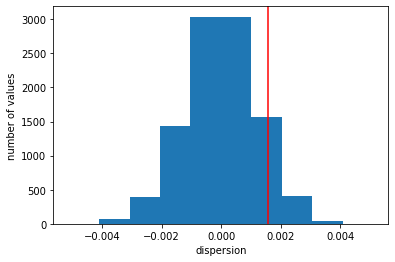

In [ ]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(x=disp, color='red');
plt.xlabel('dispersion');
plt.ylabel('number of values');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
actual2= df2.query('landing_page == "new_page"').converted.mean()
actual1= df2.query('landing_page == "old_page"').converted.mean()     
actual=actual2-actual1   
(p_diffs > actual).mean()        

0.905

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
What we have calculated here is nothing but the P values, which is also known "Significance Value" or "Alpha"as we failed to reject Null hypothesis as p value is greater than .05. That means conversion rate of new & old page is same..

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

old = df2.query('landing_page == "old_page" & converted == "1"').count()[0]
new = df2.query('landing_page == "new_page" & converted == "1"').count()[0]
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
old, new, n_old, n_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.[Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [ ]:
z_score, p_value = sm.stats.proportions_ztest([old, new], [n_old, n_new])
z_score, p_value

(1.3116075339133115, 0.18965258971881804)

In [ ]:
from scipy.stats import norm
## We are using Normal Cumalative distribution here as we are assuming that random variables are normally distributed.
norm.cdf(z_score) 

0.905173705140591

In [ ]:
#  critical value at 95% confidence interval tells us that we are 95 out 100 times sure that the vlaue will be in the specicied region, & giving the 5% level of room for error.

Value=norm.ppf(1-(0.05/2)) 
print(Value)

1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

We fail to reject the Null hypothesis that the new page is converting less or equal users old new page as Z score is less than the critical value at 95% confidence interval. Moreover calculated p value is also less than the level of significancet, which also suggest that we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** This is a binary , classification problem, though, we could use other classification solution as "Desicion Tree', " Random Forest", but we will use "Logistic regression" here.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
df2['intercept']=1

In [ ]:
df2['ab_page']=0  ##getting this hint from the earlier submission from the reviewer 

In [ ]:
ab_page_index = df2[df2['group']=='treatment'].index

In [ ]:
df2.loc[ab_page_index, "ab_page"] = 1

In [ ]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.144,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.941,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.611,treatment,new_page,1,1,1


In [ ]:
# Dummy variables.
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])
# drop the treatment column since this is not necessary
df2 = df2.drop('treatment',axis= 1)

In [ ]:

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.144,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.941,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.611,treatment,new_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [ ]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
outcome = model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [ ]:
outcome.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:               8.085e-06
Time:                        15:35:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
outcome.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:               8.085e-06
Time:                        15:36:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**
* First of all, the logistic regression here is a one tailed test & and for the part II we have used two tailed test. The p value in the logistic regression here is .19. In this case of logistic regression the null hypothesis would be that there is no relationship between ab_page or intercept with the Conversion rate. in the two tailed test our null hypothesis was if  difference of conversions rates for the new and the old page is less or equal to 0. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
*  We can add more variable if that increases the power of explaination of the model. For example here we could add Gender or Age and see which age group of people are exploring much among the two pages. adding more variable will increase the R square that's why we need to calculate adjusted R square to find out whether adding more variable actually improves the performance of the model, adding more variable, which do not increase the explaination with decrease the performance of the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**Answer:** #####The country that a user is in does not affect the conversion rate. We can determine this by figuring out the conversion rate of each of the countries. US: 0.1195 UK: 0.1206 CA: 0.1153 These are approximately all the same. We fail to reject the null hypothesis.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving countries.xlsx to countries (1).xlsx


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "countries.xlsx" with length 4460030 bytes


In [ ]:
!pip install Openpyxl
import io
import io
import numpy as np
import pandas as pd
new_var=pd.read_excel(io.BytesIO(uploaded['countries.xlsx']))
new_var.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [ ]:
# create dummy variables.
new_var[['CA','UK', 'US']] = pd.get_dummies(new_var['country'])
new_var = new_var.drop('CA', axis=1)
new_var.head()

,user_id,country,UK,US
0,834778,UK,1,0
1,928468,US,0,1
2,822059,UK,1,0
3,711597,UK,1,0
4,710616,UK,1,0


In [ ]:
new_var['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [ ]:
new_var1 = df2.join(new_var.set_index('user_id'), on='user_id')
new_var1.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
2,661590,2017-01-11 16:55:06.154,treatment,new_page,0,1,0,US,0,1
3,853541,2017-01-08 18:28:03.144,treatment,new_page,0,1,0,US,0,1
6,679687,2017-01-19 03:26:46.941,treatment,new_page,1,1,0,CA,0,0
8,817355,2017-01-04 17:58:08.979,treatment,new_page,1,1,0,UK,1,0
9,839785,2017-01-15 18:11:06.611,treatment,new_page,1,1,0,CA,0,0


In [ ]:
new_var1 = new_var.set_index('user_id').join(df2.set_index('user_id'), how='inner')
new_var1.head()

,country,UK,US,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,
630000,US,0,1,2017-01-19 06:26:06.549,treatment,new_page,0,1,0
630001,US,0,1,2017-01-16 03:16:42.560,treatment,new_page,1,1,0
630002,US,0,1,2017-01-19 19:20:56.438,control,old_page,0,1,1
630003,US,0,1,2017-01-12 10:09:31.510,treatment,new_page,0,1,0
630004,US,0,1,2017-01-18 20:23:58.825,treatment,new_page,0,1,0


In [ ]:
new_var1.query('US == "1"').converted.mean(),\
      new_var1.query('UK == "1"').converted.mean()

(0.11954621353501621, 0.12059448568984076)

In [ ]:
new_var1['US_ab_page'] = new_var1['US'] * new_var1['ab_page']
new_var1['UK_ab_page'] = new_var1['UK'] * new_var1['ab_page']


In [ ]:
lm = sm.Logit(new_var1['converted'], new_var1[['intercept', 'UK', 'US','ab_page']])
findings = lm.fit()
findings.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:               2.324e-05
Time:                        17:15:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page        0.0150      0.011      1.308      0.191      -0.007       0.037
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
## Getting this  idea from the earlier submission feedback
new_var1['US_ab_page'] = new_var1['US'] * new_var1['ab_page']
new_var1['UK_ab_page'] = new_var1['UK'] * new_var1['ab_page']


In [ ]:
## Getting this  idea from the earlier submission feedback
log_mod = sm.Logit(new_var1['converted'], new_var1[['intercept', 'ab_page', 'US','UK','US_ab_page', 'UK_ab_page']])
findings1 = log_mod.fit()
findings1.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.9124
Date:               2021-08-20 17:07 BIC:              212846.3903
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.19182    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0715    0.0371  -55.7977  0.0000  -2.1442  -1.9987
ab_page        0.0674    0.0520    1.2967  0.1947  -0.0345   0.1694
US             0.0644    0.0384    1.6785  0.0933  -0.0108   0.1396
UK             0.0901    0.0405    2.2252  0.0261   0.0107   0.1694
US_ab_page    -0.0469    0.0538   -0.8716  0.3834  -0.1523   0.0585
UK_ab_page    -0.0783    0.0568   -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

**Summary & Conclusion:** Now The P value of ab_page is still .19 lower than the level of significance, hence, we fail the reject the null hypothesis.None of the tests that we have conducted gave us enough reason to believe that new page will do better in converting more users, The present value of the future return doesen't seem to be surpassing the cost of launching the new page. we should keep the old page.